In [32]:
import os
os.getcwd()
import pandas as pd
import glob
import os
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.chunk import tree2conlltags
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.classify import apply_features
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np
# import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Gutenberg_English_Fiction_1k'

# Data exploration and preparation

In [ ]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Gutenberg_English_Fiction_1k\\master996.csv', delimiter=';', encoding= 'unicode_escape') #original csv
df

,Book_Name,book_id,guten_genre,Author_Name
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067.epub,Detective and Mystery,Stevenson| Burton Egbert
1,The Pupil,pg1032.epub,Literary,James| Henry
2,At Love's Cost,pg10379.epub,Literary,Garvice| Charles
3,The Heart of the Range,pg10473.epub,Western Stories,White| William Patterson
4,The Worshipper of the Image,pg10812.epub,Literary,Gallienne| Richard Le
...,...,...,...,...
991,David Copperfield,pg766DickensDavidCopfld.epub,Literary,Dickens| Charles
992,Hard Times,pg786DickensHardTimes.epub,Literary,Dickens| Charles
993,Memoirs of Shelock Holmes,pg834DoyleMemoirsSherlk.epub,Detective and Mystery,Connan| Doyle
994,The Mysterious Affair at Styles,pg863Agatha1.epub,Detective and Mystery,Christie| Agatha


In [ ]:
#remove .epub extension from book_id
df['book_id'] = df['book_id'].str[:-5]
df
#df.to_excel('test.xlsx', sheet_name='sheet1', index=False)

,Book_Name,book_id,guten_genre,Author_Name
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067,Detective and Mystery,Stevenson| Burton Egbert
1,The Pupil,pg1032,Literary,James| Henry
2,At Love's Cost,pg10379,Literary,Garvice| Charles
3,The Heart of the Range,pg10473,Western Stories,White| William Patterson
4,The Worshipper of the Image,pg10812,Literary,Gallienne| Richard Le
...,...,...,...,...
991,David Copperfield,pg766DickensDavidCopfld,Literary,Dickens| Charles
992,Hard Times,pg786DickensHardTimes,Literary,Dickens| Charles
993,Memoirs of Shelock Holmes,pg834DoyleMemoirsSherlk,Detective and Mystery,Connan| Doyle
994,The Mysterious Affair at Styles,pg863Agatha1,Detective and Mystery,Christie| Agatha


In [ ]:
print("Number of genres:", df.guten_genre.nunique())

Number of genres: 9


In [ ]:
print("Genres:")
df.guten_genre.unique()

Genres:


array(['Detective and Mystery', 'Literary', 'Western Stories',
       'Ghost and Horror', 'Christmas Stories', 'Love and Romance',
       'Sea and Adventure', 'Allegories', 'Humorous and Wit and Satire'],
      dtype=object)

In [ ]:
print("Number of books in the dataset for each genre:") #note the class imbalance
df.guten_genre.value_counts()

Number of books in the dataset for each genre:


Literary                       794
Detective and Mystery          111
Sea and Adventure               36
Love and Romance                18
Western Stories                 18
Ghost and Horror                 6
Humorous and Wit and Satire      6
Christmas Stories                5
Allegories                       2
Name: guten_genre, dtype: int64

In [ ]:
import glob
import os
#get data
file_list = glob.glob(os.path.join(os.getcwd(), "Gutenberg_19th_century_English_Fiction", "*.html")) #contains path to file
ids_book = []
corpus = []
count = 0
for file_path in file_list:
  if os.path.getsize(file_path) > 0: #ignore empty files
    name = os.path.basename(file_path)
    newFilename = name.replace("-content.html", "")
    if newFilename in df.book_id.values: #only add books to the list which are there in csv
      with open(file_path, encoding='UTF-8') as f_input:
          count+=1
          corpus.append(f_input.read())
          ids_book.append(newFilename)
          print("appending file {} count {}".format(name, count)) #there are 996 books in total in the given csv file
  else:
     print("Empty file:"+format(file_path))

appending file pg10067-content.html count 1
appending file pg1032-content.html count 2
appending file pg10379-content.html count 3
appending file pg10473-content.html count 4
appending file pg105JaneAusPersuatn-content.html count 5
appending file pg10812-content.html count 6
appending file pg10826-content.html count 7
appending file pg108DoyleReturnSherlk-content.html count 8
appending file pg10943-content.html count 9
appending file pg11004-content.html count 10
appending file pg11005-content.html count 11
appending file pg11259-content.html count 12
appending file pg11280-content.html count 13
appending file pg11520-content.html count 14
appending file pg1155Agatha2-content.html count 15
appending file pg11581-content.html count 16
appending file pg11655-content.html count 17
appending file pg11674-content.html count 18
appending file pg1190-content.html count 19
appending file pg1193-content.html count 20
appending file pg11931-content.html count 21
appending file pg11970-content.ht

appending file pg18022-content.html count 178
appending file pg18052-content.html count 179
appending file pg18054-content.html count 180
appending file pg1809-content.html count 181
appending file pg18239-content.html count 182
appending file pg18259-content.html count 183
appending file pg18280-content.html count 184
appending file pg1832-content.html count 185
appending file pg1833-content.html count 186
appending file pg18336-content.html count 187
appending file pg1834-content.html count 188
appending file pg1835-content.html count 189
appending file pg1836-content.html count 190
appending file pg18434-content.html count 191
appending file pg18443-content.html count 192
appending file pg18449-content.html count 193
appending file pg1846-content.html count 194
appending file pg18488-content.html count 195
appending file pg18489-content.html count 196
appending file pg1849-content.html count 197
appending file pg1851-content.html count 198
appending file pg18545-content.html count 1

appending file pg29697-content.html count 355
appending file pg29699-content.html count 356
appending file pg29715-content.html count 357
appending file pg29726-content.html count 358
appending file pg29729-content.html count 359
appending file pg29743-content.html count 360
appending file pg29753-content.html count 361
appending file pg29760-content.html count 362
appending file pg29766-content.html count 363
appending file pg29808-content.html count 364
appending file pg29847-content.html count 365
appending file pg29851-content.html count 366
appending file pg29860-content.html count 367
appending file pg29862-content.html count 368
appending file pg29868-content.html count 369
appending file pg29880-content.html count 370
appending file pg29890-content.html count 371
appending file pg29891-content.html count 372
appending file pg29902-content.html count 373
appending file pg29945-content.html count 374
appending file pg30031-content.html count 375
appending file pg30037-content.htm

appending file pg34999-content.html count 532
appending file pg35003-content.html count 533
appending file pg35038-content.html count 534
appending file pg35057-content.html count 535
appending file pg35058-content.html count 536
appending file pg35077-content.html count 537
appending file pg35078-content.html count 538
appending file pg35140-content.html count 539
appending file pg35146-content.html count 540
appending file pg35203-content.html count 541
appending file pg35205-content.html count 542
appending file pg35214-content.html count 543
appending file pg35217-content.html count 544
appending file pg35233-content.html count 545
appending file pg35254-content.html count 546
appending file pg35294-content.html count 547
appending file pg35296-content.html count 548
appending file pg35297-content.html count 549
appending file pg35304-content.html count 550
appending file pg35313-content.html count 551
appending file pg35326-content.html count 552
appending file pg35336-content.htm

appending file pg41122-content.html count 711
appending file pg41191-content.html count 712
appending file pg41212-content.html count 713
appending file pg41247-content.html count 714
appending file pg41284-content.html count 715
appending file pg41313-content.html count 716
appending file pg41314-content.html count 717
appending file pg41315-content.html count 718
appending file pg41329-content.html count 719
appending file pg41330-content.html count 720
appending file pg41331-content.html count 721
appending file pg41332-content.html count 722
appending file pg41339-content.html count 723
appending file pg41340-content.html count 724
appending file pg41341-content.html count 725
appending file pg41374-content.html count 726
appending file pg41375-content.html count 727
appending file pg41376-content.html count 728
appending file pg41459-content.html count 729
appending file pg41483-content.html count 730
appending file pg41490-content.html count 731
appending file pg41525-content.htm

appending file pg53356-content.html count 892
appending file pg53604-content.html count 893
appending file pg53668-content.html count 894
appending file pg537DoyleTerrorTales-content.html count 895
appending file pg547-content.html count 896
appending file pg5622-content.html count 897
appending file pg5662-content.html count 898
appending file pg5663-content.html count 899
appending file pg5705-content.html count 900
appending file pg5848-content.html count 901
appending file pg5869-content.html count 902
appending file pg587-content.html count 903
appending file pg6005-content.html count 904
appending file pg6028-content.html count 905
appending file pg6057-content.html count 906
appending file pg6060-content.html count 907
appending file pg6102-content.html count 908
appending file pg6105-content.html count 909
appending file pg6113-content.html count 910
appending file pg620CarolBruno-content.html count 911
appending file pg6292-content.html count 912
appending file pg6293-content.

In [ ]:
print(ids_book)

['pg10067', 'pg1032', 'pg10379', 'pg10473', 'pg105JaneAusPersuatn', 'pg10812', 'pg10826', 'pg108DoyleReturnSherlk', 'pg10943', 'pg11004', 'pg11005', 'pg11259', 'pg11280', 'pg11520', 'pg1155Agatha2', 'pg11581', 'pg11655', 'pg11674', 'pg1190', 'pg1193', 'pg11931', 'pg11970', 'pg11CarolAlice', 'pg12102', 'pg1218', 'pg12181', 'pg12303', 'pg12304', 'pg12360', 'pg12450', 'pg12453', 'pg12470', 'pg12520', 'pg1253', 'pg12672', 'pg1273', 'pg12733', 'pg12886', 'pg12935', 'pg12972', 'pg12989', 'pg12CarolGlassLook', 'pg13057', 'pg13162', 'pg13178', 'pg13212', 'pg13257', 'pg13273', 'pg13312', 'pg1342JaneAustenPP', 'pg13432', 'pg13454', 'pg13541', 'pg13572', 'pg13720HermanVoyage1', 'pg13721HermanVoyage2', 'pg13776', 'pg13913', 'pg1392', 'pg13960', 'pg13985', 'pg1400DickensGreatExp', 'pg14051', 'pg14079', 'pg14145', 'pg141JaneAusMansPark', 'pg1422', 'pg14253', 'pg14303', 'pg14382', 'pg14395', 'pg14420', 'pg14427', 'pg14454', 'pg14490', 'pg14523', 'pg14581', 'pg14605', 'pg14669', 'pg14687', 'pg14708', 

In [ ]:
print(len(ids_book))

994


In [ ]:
print(corpus[0]) #view raw data

<p>A Detective Story
<p>A.B.M. Fellow-Sherlockian
<p>"Hello!" I said, as I took down the receiver of my desk 'phone, in answer to the call.
<p>"Mr. Vantine wishes to speak to you, sir," said the office-boy.
<p>"All right," and I heard the snap of the connection.
<p>"Is that you, Lester?" asked Philip Vantine's voice.
<p>"Yes. So you're back again?"
<p>"Got in yesterday. Can you come up to the house and lunch with me to-day?"
<p>"I'll be glad to," I said, and meant it, for I liked Philip Vantine.
<p>"I'll look for you, then, about one-thirty."
<p>And that is how it happened that, an hour later, I was walking over toward Washington Square, just above which, on the Avenue, the old Vantine mansion stood. It was almost the last survival of the old régime; for the tide of business had long since overflowed from the neighbouring streets into the Avenue and swept its fashionable folk far uptown. Tall office and loft buildings had replaced the brownstone houses; only here and there did some old

In [ ]:
#Remove html tags from text
import re
corpus_new = []
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
for i in range(len(corpus)):
    corpus_new.append(remove_html_tags(corpus[i]))

In [ ]:
print(corpus_new[0])

A Detective Story
A.B.M. Fellow-Sherlockian
"Hello!" I said, as I took down the receiver of my desk 'phone, in answer to the call.
"Mr. Vantine wishes to speak to you, sir," said the office-boy.
"All right," and I heard the snap of the connection.
"Is that you, Lester?" asked Philip Vantine's voice.
"Yes. So you're back again?"
"Got in yesterday. Can you come up to the house and lunch with me to-day?"
"I'll be glad to," I said, and meant it, for I liked Philip Vantine.
"I'll look for you, then, about one-thirty."
And that is how it happened that, an hour later, I was walking over toward Washington Square, just above which, on the Avenue, the old Vantine mansion stood. It was almost the last survival of the old régime; for the tide of business had long since overflowed from the neighbouring streets into the Avenue and swept its fashionable folk far uptown. Tall office and loft buildings had replaced the brownstone houses; only here and there did some old family hold on, like a sullen an

In [ ]:
#target names
target_names = []
target_names = df.guten_genre.unique().tolist()
print(target_names)

['Detective and Mystery', 'Literary', 'Western Stories', 'Ghost and Horror', 'Christmas Stories', 'Love and Romance', 'Sea and Adventure', 'Allegories', 'Humorous and Wit and Satire']


In [ ]:
genre_from_csv = []
print(ids_book)
for i in ids_book:
  genre = df.loc[df['book_id'] == i, 'guten_genre'].iloc[0]
  genre_from_csv.append(genre)
print(genre_from_csv)

['pg10067', 'pg1032', 'pg10379', 'pg10473', 'pg105JaneAusPersuatn', 'pg10812', 'pg10826', 'pg108DoyleReturnSherlk', 'pg10943', 'pg11004', 'pg11005', 'pg11259', 'pg11280', 'pg11520', 'pg1155Agatha2', 'pg11581', 'pg11655', 'pg11674', 'pg1190', 'pg1193', 'pg11931', 'pg11970', 'pg11CarolAlice', 'pg12102', 'pg1218', 'pg12181', 'pg12303', 'pg12304', 'pg12360', 'pg12450', 'pg12453', 'pg12470', 'pg12520', 'pg1253', 'pg12672', 'pg1273', 'pg12733', 'pg12886', 'pg12935', 'pg12972', 'pg12989', 'pg12CarolGlassLook', 'pg13057', 'pg13162', 'pg13178', 'pg13212', 'pg13257', 'pg13273', 'pg13312', 'pg1342JaneAustenPP', 'pg13432', 'pg13454', 'pg13541', 'pg13572', 'pg13720HermanVoyage1', 'pg13721HermanVoyage2', 'pg13776', 'pg13913', 'pg1392', 'pg13960', 'pg13985', 'pg1400DickensGreatExp', 'pg14051', 'pg14079', 'pg14145', 'pg141JaneAusMansPark', 'pg1422', 'pg14253', 'pg14303', 'pg14382', 'pg14395', 'pg14420', 'pg14427', 'pg14454', 'pg14490', 'pg14523', 'pg14581', 'pg14605', 'pg14669', 'pg14687', 'pg14708', 

['Detective and Mystery', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Ghost and Horror', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Sea and Adventure', 'Literary', 'Literary', 'Christmas Stories', 'Love and Romance', 'Literary', 'Literary', 'Love and Romance', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Li

# Feature extraction

In [ ]:
# import library
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon') #for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import tree2conlltags
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is alr

In [ ]:
#extract female propernoun feature from corpus
femalePropN_list=['she']
def femalePropN(corpus_lemmas):
  count = 0  
  featureCount={}
  for lemmas in corpus_lemmas:
    if lemmas in femalePropN_list:
      count= count+1  
  featureCount['femalePropN']=count
  return featureCount

#extract male propernoun feature from corpus
malePropN_list=['he']
def malePropN(corpus_lemmas):
  count = 0  
  featureCount={}
  for lemmas in corpus_lemmas:
    if lemmas in malePropN_list:
      count= count+1
  featureCount['malePropN']=count
  return featureCount

#extract count of paragraphs
def countParas(corpus):
  featureCount={}
  num_paras = len(corpus.split("\n"))
  featureCount['countParas']=num_paras
  return featureCount
  
#extract the average length of sentences
def avgSentsLength(corpus, tokens):
  featureCount={}
  num_sents = len(sent_tokenize(corpus))  #to get number of sentences
  total_len_sent = len(tokens)  #adding all sentence length to get total
  if num_sents != 0: #because book pg38685 is empty
    avg_sent_length = int(total_len_sent/num_sents)
    featureCount['avgSentsLength']=avg_sent_length        
  else:
    featureCount['avgSentsLength']=0
  return featureCount

#extract the pos tag count for each corpus file
def pos_tag(corpus):  
  word_tag=nltk.pos_tag(corpus)
  featureCount={}
  for word_tag_itr in word_tag:
    if word_tag_itr[1]  in featureCount:
      featureCount[word_tag_itr[1]]=featureCount[word_tag_itr[1]]+1
    else:
      featureCount[word_tag_itr[1]]=1
  return featureCount

#extract semi colon count
def semiColonCount(tokens):  
  featureCount = {}
  count = 0
  for t in range(len(tokens)):          
    if ';' in tokens[t]:      
      count = count + 1 
  featureCount['semiColonCount'] = count 
  return featureCount

#extract named entities
def namedEntityExtractor(tuple1):
    featureCount = {}
    #bring the tuple back to lists to work with it
    if len(tuple1) != 0:
      words, tags, pos = zip(*tuple1)
      words = list(words)
      pos = list(pos)
      c_persons = list()
      c_gpe = list()
      i=0
      while i<= len(tuple1)-1:
          if pos[i] == 'B-PERSON':
              c_persons = c_persons + [words[i]]
              featureCount['persons_count'] = len(set(c_persons))
          elif pos[i] == 'B-GPE':
              c_gpe = c_gpe + [words[i]]
              featureCount['location_count'] = len(set(c_gpe))
          i=i+1
    
    else:
      featureCount['persons_count'] = 0
      featureCount['location_count'] = 0
      
    return featureCount

In [ ]:
def feature_extractor(corpus):
  #tokenizer = RegexpTokenizer('\w+')
  lemmas = []
  feature_set_f=[]
  for i in range(len(corpus)):
    #feature_set=[]  
    wordpunc_tokens = word_tokenize(corpus[i]) #words + punctuations
    lemmatized_words = ' '.join([WordNetLemmatizer().lemmatize(w) for w in wordpunc_tokens])
    lemmas = lemmatized_words.split(' ')
    feature={}
    out=femalePropN(lemmas)# 1st feature extraction   
    feature.update(out) 
    out=malePropN(lemmas) # 2nd feature extraction   
    feature.update(out)
    out = countParas(corpus[i]) # 3rd feature extraction  
    feature.update(out)
    out = avgSentsLength(corpus[i], wordpunc_tokens) # 4th feature extraction  
    feature.update(out)
    out = semiColonCount(wordpunc_tokens) # 5th feature extraction  
    feature.update(out)
    out = pos_tag(wordpunc_tokens) # 6th feature extraction 
    feature.update(out)
    out = namedEntityExtractor(tree2conlltags(nltk.ne_chunk(nltk.pos_tag(wordpunc_tokens)))) # 7th feature extraction
    feature.update(out)
    out = SentimentIntensityAnalyzer().polarity_scores(corpus[i]) # 8th feature extraction 
    feature.update(out)
    feature_set_f.append(feature)
    print(i)
  return feature_set_f

In [ ]:
from nltk.classify import apply_features
feature_set = feature_extractor(corpus_new)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
file1 = open("featureset236.txt", "w")
print(feature_set)
file1.write(str(feature_set))
file1.close()

[{'femalePropN': 113, 'malePropN': 1257, 'countParas': 2283, 'avgSentsLength': 17, 'semiColonCount': 558, 'DT': 6915, 'NNP': 3207, '.': 5048, 'JJ': 3310, "''": 2496, 'NN': 8689, 'PRP': 8391, 'VBD': 5993, ',': 5669, 'IN': 7753, 'RP': 462, 'PRP$': 1403, 'CD': 472, 'TO': 1789, '``': 2482, 'VBZ': 1300, 'VB': 3046, 'CC': 2668, 'JJR': 115, 'POS': 265, 'UH': 159, 'VBP': 1507, 'RB': 4818, 'MD': 1267, 'WRB': 380, 'VBG': 1077, 'WDT': 353, ':': 1089, 'VBN': 1590, 'NNS': 1529, 'JJS': 116, 'RBR': 85, 'EX': 259, 'WP$': 15, 'WP': 411, 'RBS': 52, 'SYM': 5, 'PDT': 71, 'FW': 21, 'NNPS': 53, 'persons_count': 117, 'location_count': 61, 'neg': 0.096, 'neu': 0.8, 'pos': 0.105, 'compound': 1.0}, {'femalePropN': 89, 'malePropN': 324, 'countParas': 268, 'avgSentsLength': 22, 'semiColonCount': 128, 'DT': 1642, 'NN': 2215, 'RB': 1262, 'VBN': 441, 'CD': 86, 'VBZ': 103, 'IN': 2258, 'NNP': 713, 'JJ': 1145, 'VBD': 1520, 'CC': 573, ':': 442, 'PRP': 1877, 'PDT': 22, 'TO': 535, 'VB': 797, 'NNS': 499, ',': 962, 'WP': 13

In [ ]:
len(feature_set)

994

# Modeling

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set, genre_from_csv, test_size=0.30, stratify = genre_from_csv)

In [ ]:
file2 = open("ytest.txt", "w")
print(y_test)
file2.write(str(y_test))
file2.close()

['Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Christmas Stories', 'Literary', 'Detective and Mystery', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary

In [ ]:
file5 = open("ytrain.txt", "w")
file5.write(str(y_train))
file5.close()

In [ ]:
train_set = []
test_set = []
for i in range(len(X_train)):
    train = []
    train.append(X_train[i])
    train.append(y_train[i])
    train_set.append(tuple(train))

for i in range(len(X_test)):
    test = []
    test.append(X_test[i])
    test.append(y_test[i])
    test_set.append(tuple(test))

In [ ]:
len(train_set)

695

In [ ]:
file3 = open("trainset.txt", "w")
print(y_test)
file3.write(str(train_set))
file3.close()

file4 = open("testset.txt", "w")
print(y_test)
file4.write(str(test_set))
file4.close()

['Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Christmas Stories', 'Literary', 'Detective and Mystery', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary

# Naive Bayes classifier

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

0.056856187290969896


In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
                       $ = 9              Love a : Litera =     23.1 : 1.0
                       $ = 5              Humoro : Litera =     21.9 : 1.0
                     SYM = 40             Love a : Litera =     16.0 : 1.0
                       ) = 2              Detect : Litera =     16.0 : 1.0
                compound = 0.9986         Sea an : Litera =     14.7 : 1.0
                      FW = 64             Humoro : Litera =     11.1 : 1.0
                     neg = 0.057          Love a : Litera =     10.8 : 1.0
                     neg = 0.131          Wester : Litera =     10.8 : 1.0
                     RBS = 77             Detect : Litera =     10.2 : 1.0
                     pos = 0.12           Detect : Litera =     10.2 : 1.0


# Decision Tree classifer

In [ ]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

In [ ]:
nltk.classify.accuracy(classifier, test_set)

0.7993311036789298

# Bernoulli Naive Bayes classifier

In [ ]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
classif = SklearnClassifier(BernoulliNB()).train(train_set)

In [ ]:
nltk.classify.accuracy(classif, test_set)

0.7859531772575251

# SVC classifier

In [ ]:
classifi = SklearnClassifier(SVC(), sparse=False).train((train_set))

In [ ]:
nltk.classify.accuracy(classifi, test_set)

0.7959866220735786

# Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = SklearnClassifier(RandomForestClassifier()).train((train_set))

In [ ]:
nltk.classify.accuracy(clf, test_set)

0.8160535117056856

# Confusion matrix -- Random forest classifier

In [ ]:
refsets = []
testsets = []
for i, (feats, label) in enumerate(test_set):
  refsets.append(label)
  observed = clf.classify(feats)
  testsets.append(observed)

In [ ]:
refsets

['Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Love and Romance',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Love and Romance',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Detective and Mystery',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Christmas Stories',
 'Literary',
 'Detective and Mystery',
 'Western Stories',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Detective and Mys

In [ ]:
testsets

['Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Detective and Mystery',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',
 'Literary',

In [ ]:
cm = nltk.ConfusionMatrix(refsets, testsets)
print(cm.pretty_format(sort_by_count=True, show_percents=True))

                            |                                                       H        |
                            |                                                       u        |
                            |                                                       m        |
                            |                                                       o        |
                            |                                                       r        |
                            |                                                       o        |
                            |             D                                         u        |
                            |             e                                         s        |
                            |             t                                                  |
                            |             e                                         a        |
                            |             c      S

# Feature selection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [6]:
import ast

with open("featureset236.txt", 'r') as f:
    mylist = ast.literal_eval(f.read())

mylist

[{"''": 2496,
  ',': 5669,
  '.': 5048,
  ':': 1089,
  'CC': 2668,
  'CD': 472,
  'DT': 6915,
  'EX': 259,
  'FW': 21,
  'IN': 7753,
  'JJ': 3310,
  'JJR': 115,
  'JJS': 116,
  'MD': 1267,
  'NN': 8689,
  'NNP': 3207,
  'NNPS': 53,
  'NNS': 1529,
  'PDT': 71,
  'POS': 265,
  'PRP': 8391,
  'PRP$': 1403,
  'RB': 4818,
  'RBR': 85,
  'RBS': 52,
  'RP': 462,
  'SYM': 5,
  'TO': 1789,
  'UH': 159,
  'VB': 3046,
  'VBD': 5993,
  'VBG': 1077,
  'VBN': 1590,
  'VBP': 1507,
  'VBZ': 1300,
  'WDT': 353,
  'WP': 411,
  'WP$': 15,
  'WRB': 380,
  '``': 2482,
  'avgSentsLength': 17,
  'compound': 1.0,
  'countParas': 2283,
  'femalePropN': 113,
  'location_count': 61,
  'malePropN': 1257,
  'neg': 0.096,
  'neu': 0.8,
  'persons_count': 117,
  'pos': 0.105,
  'semiColonCount': 558},
 {"''": 336,
  ',': 962,
  '.': 911,
  ':': 442,
  'CC': 573,
  'CD': 86,
  'DT': 1642,
  'EX': 47,
  'FW': 2,
  'IN': 2258,
  'JJ': 1145,
  'JJR': 58,
  'JJS': 44,
  'MD': 338,
  'NN': 2215,
  'NNP': 713,
  'NNPS': 10

In [7]:
import pandas as pd
df = pd.DataFrame(mylist)
df.head(3)

,femalePropN,malePropN,countParas,avgSentsLength,semiColonCount,DT,NNP,.,JJ,'',NN,PRP,VBD,",",IN,RP,PRP$,CD,TO,``,VBZ,VB,CC,JJR,POS,UH,VBP,RB,MD,WRB,VBG,WDT,:,VBN,NNS,JJS,RBR,EX,WP$,WP,RBS,SYM,PDT,FW,NNPS,persons_count,location_count,neg,neu,pos,compound,(,),#,$,LS
0,113,1257,2283,17,558,6915,3207,5048,3310,2496.0,8689,8391.0,5993.0,5669,7753,462.0,1403.0,472.0,1789,2482.0,1300.0,3046.0,2668,115.0,265,159.0,1507.0,4818.0,1267.0,380.0,1077.0,353.0,1089.0,1590.0,1529.0,116.0,85.0,259.0,15.0,411.0,52.0,5.0,71.0,21.0,53.0,117,61.0,0.096,0.800,0.105,1.0,NaN,NaN,NaN,NaN,NaN
1,89,324,268,22,128,1642,713,911,1145,336.0,2215,1877.0,1520.0,962,2258,112.0,491.0,86.0,535,338.0,103.0,797.0,573,58.0,94,20.0,341.0,1262.0,338.0,122.0,277.0,107.0,442.0,441.0,499.0,44.0,36.0,47.0,4.0,139.0,8.0,3.0,22.0,2.0,10.0,20,30.0,0.078,0.779,0.143,1.0,NaN,NaN,NaN,NaN,NaN
2,1785,2275,3510,20,1820,13197,6446,8891,8642,3401.0,20068,17455.0,11564.0,11771,17708,773.0,5049.0,656.0,3758,3247.0,2331.0,6294.0,7156,290.0,777,535.0,3801.0,9860.0,2737.0,778.0,2316.0,872.0,4021.0,3657.0,3659.0,294.0,173.0,445.0,30.0,758.0,60.0,14.0,181.0,26.0,15.0,181,158.0,0.085,0.759,0.156,1.0,NaN,NaN,NaN,NaN,NaN


In [8]:
books_genre = ['Detective and Mystery', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Ghost and Horror', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Sea and Adventure', 'Literary', 'Literary', 'Christmas Stories', 'Love and Romance', 'Literary', 'Literary', 'Love and Romance', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Allegories', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Christmas Stories', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Love and Romance', 'Detective and Mystery', 'Sea and Adventure', 'Sea and Adventure', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Sea and Adventure', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Sea and Adventure', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Allegories', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Ghost and Horror', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Ghost and Horror', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Humorous and Wit and Satire', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Sea and Adventure', 'Literary', 'Western Stories', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Humorous and Wit and Satire', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Humorous and Wit and Satire', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Humorous and Wit and Satire', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Ghost and Horror', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Sea and Adventure', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Western Stories', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Christmas Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Sea and Adventure', 'Ghost and Horror', 'Literary', 'Christmas Stories', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Western Stories', 'Literary', 'Western Stories', 'Literary', 'Literary', 'Western Stories', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Western Stories', 'Literary', 'Love and Romance', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Western Stories', 'Detective and Mystery', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Detective and Mystery', 'Literary', 'Christmas Stories', 'Literary', 'Literary', 'Literary', 'Literary', 'Humorous and Wit and Satire', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Humorous and Wit and Satire', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Ghost and Horror', 'Detective and Mystery', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Love and Romance', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Literary', 'Detective and Mystery', 'Literary', 'Detective and Mystery', 'Literary', 'Sea and Adventure', 'Literary', 'Literary', 'Sea and Adventure', 'Literary', 'Literary']

In [9]:
genre = pd.DataFrame(books_genre)

In [10]:
df.insert(loc = 0, column = 'guten_genre', value = genre)

In [11]:
df.head(3)

,guten_genre,femalePropN,malePropN,countParas,avgSentsLength,semiColonCount,DT,NNP,.,JJ,'',NN,PRP,VBD,",",IN,RP,PRP$,CD,TO,``,VBZ,VB,CC,JJR,POS,UH,VBP,RB,MD,WRB,VBG,WDT,:,VBN,NNS,JJS,RBR,EX,WP$,WP,RBS,SYM,PDT,FW,NNPS,persons_count,location_count,neg,neu,pos,compound,(,),#,$,LS
0,Detective and Mystery,113,1257,2283,17,558,6915,3207,5048,3310,2496.0,8689,8391.0,5993.0,5669,7753,462.0,1403.0,472.0,1789,2482.0,1300.0,3046.0,2668,115.0,265,159.0,1507.0,4818.0,1267.0,380.0,1077.0,353.0,1089.0,1590.0,1529.0,116.0,85.0,259.0,15.0,411.0,52.0,5.0,71.0,21.0,53.0,117,61.0,0.096,0.800,0.105,1.0,NaN,NaN,NaN,NaN,NaN
1,Literary,89,324,268,22,128,1642,713,911,1145,336.0,2215,1877.0,1520.0,962,2258,112.0,491.0,86.0,535,338.0,103.0,797.0,573,58.0,94,20.0,341.0,1262.0,338.0,122.0,277.0,107.0,442.0,441.0,499.0,44.0,36.0,47.0,4.0,139.0,8.0,3.0,22.0,2.0,10.0,20,30.0,0.078,0.779,0.143,1.0,NaN,NaN,NaN,NaN,NaN
2,Literary,1785,2275,3510,20,1820,13197,6446,8891,8642,3401.0,20068,17455.0,11564.0,11771,17708,773.0,5049.0,656.0,3758,3247.0,2331.0,6294.0,7156,290.0,777,535.0,3801.0,9860.0,2737.0,778.0,2316.0,872.0,4021.0,3657.0,3659.0,294.0,173.0,445.0,30.0,758.0,60.0,14.0,181.0,26.0,15.0,181,158.0,0.085,0.759,0.156,1.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# check how many null values are in our dataset
df.isnull().sum()

guten_genre         0
femalePropN         0
malePropN           0
countParas          0
avgSentsLength      0
semiColonCount      0
DT                  0
NNP                 0
.                   0
JJ                  0
''                  1
NN                  0
PRP                 1
VBD                 1
,                   0
IN                  0
RP                  1
PRP$                1
CD                  1
TO                  0
``                  2
VBZ                 1
VB                  1
CC                  0
JJR                 1
POS                 0
UH                  2
VBP                 1
RB                  1
MD                  1
WRB                 1
VBG                 1
WDT                 1
:                   1
VBN                 1
NNS                 1
JJS                 1
RBR                 1
EX                  1
WP$                21
WP                  1
RBS                 7
SYM               173
PDT                 3
FW                 23
NNPS      

In [13]:
# drop those features which are non-sensible or have many NAN values
df.drop(['WP$', 'SYM', 'FW', 'NNPS', '(', ')', '#', '$', 'LS', ','], axis = 1, inplace = True)

In [14]:
df.head(3)

,guten_genre,femalePropN,malePropN,countParas,avgSentsLength,semiColonCount,DT,NNP,.,JJ,'',NN,PRP,VBD,IN,RP,PRP$,CD,TO,``,VBZ,VB,CC,JJR,POS,UH,VBP,RB,MD,WRB,VBG,WDT,:,VBN,NNS,JJS,RBR,EX,WP,RBS,PDT,persons_count,location_count,neg,neu,pos,compound
0,Detective and Mystery,113,1257,2283,17,558,6915,3207,5048,3310,2496.0,8689,8391.0,5993.0,7753,462.0,1403.0,472.0,1789,2482.0,1300.0,3046.0,2668,115.0,265,159.0,1507.0,4818.0,1267.0,380.0,1077.0,353.0,1089.0,1590.0,1529.0,116.0,85.0,259.0,411.0,52.0,71.0,117,61.0,0.096,0.800,0.105,1.0
1,Literary,89,324,268,22,128,1642,713,911,1145,336.0,2215,1877.0,1520.0,2258,112.0,491.0,86.0,535,338.0,103.0,797.0,573,58.0,94,20.0,341.0,1262.0,338.0,122.0,277.0,107.0,442.0,441.0,499.0,44.0,36.0,47.0,139.0,8.0,22.0,20,30.0,0.078,0.779,0.143,1.0
2,Literary,1785,2275,3510,20,1820,13197,6446,8891,8642,3401.0,20068,17455.0,11564.0,17708,773.0,5049.0,656.0,3758,3247.0,2331.0,6294.0,7156,290.0,777,535.0,3801.0,9860.0,2737.0,778.0,2316.0,872.0,4021.0,3657.0,3659.0,294.0,173.0,445.0,758.0,60.0,181.0,181,158.0,0.085,0.759,0.156,1.0


In [15]:
# Get mean value of each column to fill NAN values of respective column
mean_values = [0]
for i in range(1, 47):
    m_value = df.iloc[:, i:i+1].mean()[0]
    mean_values.append(m_value)

In [16]:
# create a dictionary of column name and mean values to pass it in fillna method
columns = df.columns.values
dic_nan = dict(zip(columns, mean_values))

In [17]:
# filling all NAN values with mean value
df.fillna(value = dic_nan, inplace = True)

In [18]:
# make sure no NAN values remain
df.isnull().sum()

guten_genre       0
femalePropN       0
malePropN         0
countParas        0
avgSentsLength    0
semiColonCount    0
DT                0
NNP               0
.                 0
JJ                0
''                0
NN                0
PRP               0
VBD               0
IN                0
RP                0
PRP$              0
CD                0
TO                0
``                0
VBZ               0
VB                0
CC                0
JJR               0
POS               0
UH                0
VBP               0
RB                0
MD                0
WRB               0
VBG               0
WDT               0
:                 0
VBN               0
NNS               0
JJS               0
RBR               0
EX                0
WP                0
RBS               0
PDT               0
persons_count     0
location_count    0
neg               0
neu               0
pos               0
compound          0
dtype: int64

# Modeling - after feature selection

In [19]:
X = df.iloc[:,1:46]
y = df.iloc[:,0:1]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Multinomial Naive Bayes

In [21]:
import numpy as np
# import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
clf = MultinomialNB()

In [24]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [25]:
predicted = clf.predict(X_test)

In [26]:
print(metrics.classification_report(y_test, predicted))

                             precision    recall  f1-score   support

                 Allegories       0.00      0.00      0.00         1
          Christmas Stories       0.00      0.00      0.00         2
      Detective and Mystery       0.35      0.48      0.41        23
           Ghost and Horror       0.08      0.33      0.13         3
Humorous and Wit and Satire       0.04      1.00      0.07         1
                   Literary       1.00      0.24      0.39       156
           Love and Romance       0.00      0.00      0.00         0
          Sea and Adventure       0.05      0.33      0.08         6
            Western Stories       0.00      0.00      0.00         7

                   accuracy                           0.27       199
                  macro avg       0.17      0.27      0.12       199
               weighted avg       0.83      0.27      0.36       199



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


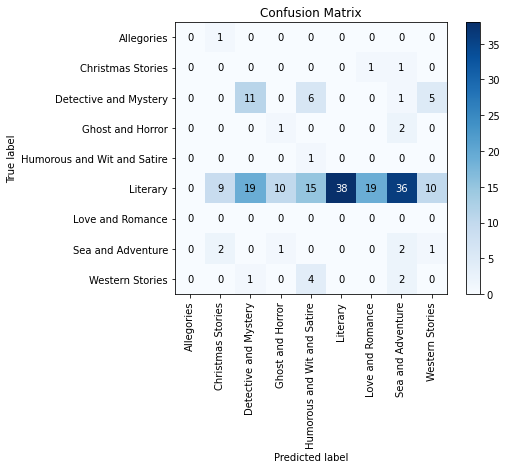

In [27]:
!pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(7,5), x_tick_rotation = 90)

# Modeling after Over-sampling with SMOTE

In [28]:
! pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [29]:
# Over_sampling minority classes
sm = SMOTE(random_state = 42, k_neighbors = 1)
X_res, y_res = sm.fit_sample(X, y)

In [30]:
y_res.guten_genre.value_counts()

Detective and Mystery          792
Humorous and Wit and Satire    792
Allegories                     792
Sea and Adventure              792
Ghost and Horror               792
Western Stories                792
Literary                       792
Love and Romance               792
Christmas Stories              792
Name: guten_genre, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20)

## Naive Bayes Classifier

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(X_train, y_train.values.ravel())

MultinomialNB()

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted))

                             precision    recall  f1-score   support

                 Allegories       0.97      1.00      0.99       152
          Christmas Stories       0.68      0.32      0.44       161
      Detective and Mystery       0.40      0.34      0.37       160
           Ghost and Horror       0.66      0.82      0.73       166
Humorous and Wit and Satire       0.77      0.70      0.73       183
                   Literary       0.32      0.30      0.31       159
           Love and Romance       0.49      0.52      0.51       145
          Sea and Adventure       0.35      0.43      0.38       143
            Western Stories       0.44      0.58      0.50       157

                   accuracy                           0.56      1426
                  macro avg       0.57      0.56      0.55      1426
               weighted avg       0.57      0.56      0.55      1426



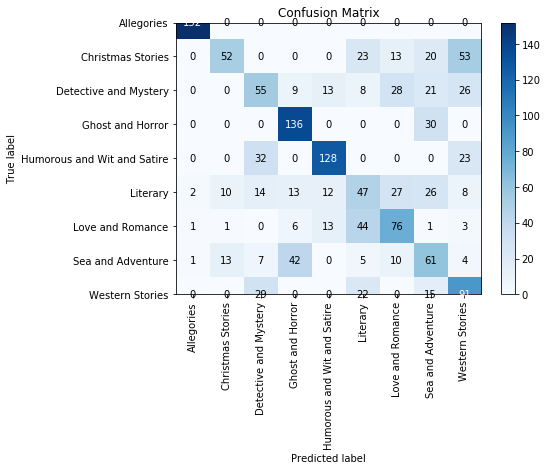

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(7,5), x_tick_rotation = 90)

In [ ]:
scores = cross_val_score(clf, X_res, y_res.values.ravel(), cv=5)

In [ ]:
print("Accuracy: {}".format(scores.mean()))

Accuracy: 0.5700072340739647


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=0)

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted))

                             precision    recall  f1-score   support

                 Allegories       1.00      1.00      1.00       152
          Christmas Stories       0.98      0.99      0.98       161
      Detective and Mystery       0.91      0.94      0.93       160
           Ghost and Horror       0.99      1.00      1.00       166
Humorous and Wit and Satire       0.98      1.00      0.99       183
                   Literary       0.90      0.70      0.79       159
           Love and Romance       0.92      0.98      0.95       145
          Sea and Adventure       0.93      0.99      0.96       143
            Western Stories       0.98      1.00      0.99       157

                   accuracy                           0.96      1426
                  macro avg       0.95      0.96      0.95      1426
               weighted avg       0.96      0.96      0.95      1426



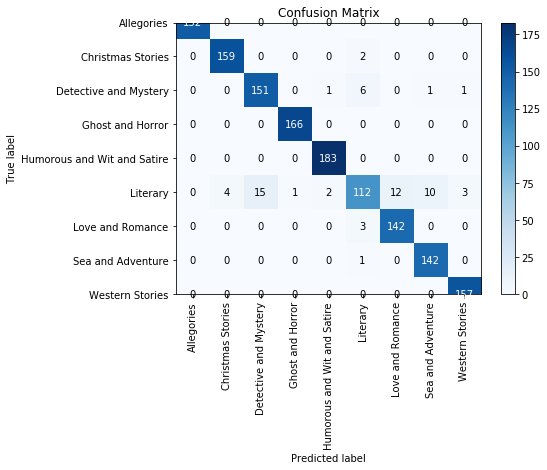

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(7,5), x_tick_rotation = 90)

In [ ]:
scores = cross_val_score(clf, X_res, y_res.values.ravel(), cv=5)

In [ ]:
print("Accuracy: {}".format(scores.mean()))

Accuracy: 0.951321079697842


## Random Forest Classsifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted))

                             precision    recall  f1-score   support

                 Allegories       1.00      1.00      1.00       152
          Christmas Stories       1.00      1.00      1.00       161
      Detective and Mystery       0.97      1.00      0.98       160
           Ghost and Horror       1.00      1.00      1.00       166
Humorous and Wit and Satire       1.00      1.00      1.00       183
                   Literary       1.00      0.95      0.97       159
           Love and Romance       0.99      1.00      1.00       145
          Sea and Adventure       0.99      1.00      0.99       143
            Western Stories       1.00      1.00      1.00       157

                   accuracy                           0.99      1426
                  macro avg       0.99      0.99      0.99      1426
               weighted avg       0.99      0.99      0.99      1426



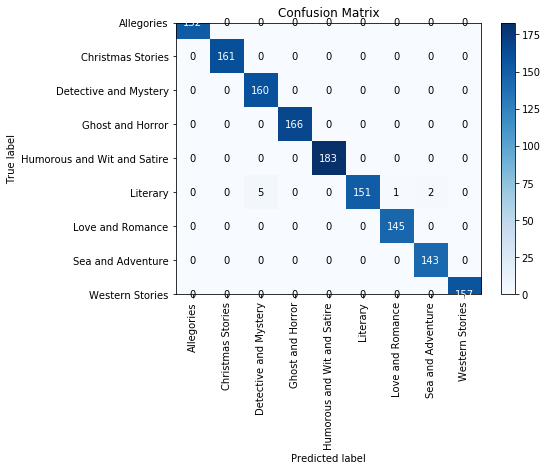

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(7,5), x_tick_rotation = 90)

In [ ]:
scores = cross_val_score(clf, X_res, y_res.values.ravel(), cv=5)

In [ ]:
print("Accuracy: {}".format(scores.mean()))

Accuracy: 0.9931260549691199
